<a href="https://colab.research.google.com/github/FSDAwaesf/Detect-Person-Class-from-img-Collage-project/blob/main/Detect_Person_Class_CNN_without_Augmentation_%26_with_Augmentation%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#needed libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import os
import random 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import cv2


#data path and number of classes

In [ ]:
data_path = '/content/drive/MyDrive/Faces data/CroppedYale'
len(os.listdir(data_path))

38

#Create lists that contain images and its labels

In [ ]:
def read_img(path):
  files_names = os.listdir(path) 
  imgs = []
  target = []
  for i in files_names:
    for j in os.listdir(path+'/'+i):
      if '.pgm' in j:
        img = cv2.imread(path+'/'+i+'/'+j)
        imgs.append(img)
        target.append(i)
  return imgs,target

#X ==> Images
#y ==> labels

In [ ]:
from sklearn.model_selection import train_test_split
X,y = read_img(data_path)


In [ ]:
X = np.array(X)
y = np.array(y).reshape(-1,1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


#all images size = (192,168)

In [ ]:
def resize_images(images):
  imgs = []
  images1 = np.asarray(images)
  for i in images1:
    img = cv2.resize(i,(168, 192))
    imgs.append(img)

  return imgs

In [ ]:
images = resize_images(X)
images[1].shape

(192, 168, 3)

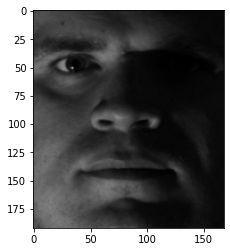

In [ ]:
plt.imshow(X[20])

#Splitting data to 90% train and 10% test

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(images,y,test_size=0.1,shuffle=True,random_state=1)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
X_train.shape

(2223, 192, 168, 3)

In [ ]:
y_train

array([['yaleB13'],
       ['yaleB10'],
       ['yaleB12'],
       ...,
       ['yaleB12'],
       ['yaleB08'],
       ['yaleB12']], dtype='<U7')

#CNN Model 1 ( without augmentation)



In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dropout,Activation,MaxPool2D,Flatten

In [ ]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(192,168,3)))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dense(1024,activation='relu'))
model.add(Dense(units=38,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 190, 166, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 95, 83, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 93, 81, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 46, 40, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 38, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 22, 19, 16)       0

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_test.shape

(247, 38)

In [ ]:
X_train.shape

(2223, 192, 168, 3)

In [ ]:
train_gen = ImageDataGenerator()
valid_gen = ImageDataGenerator()

In [ ]:
X_train, X_valid, y_train, y_valid =train_test_split(X_train,y_train,test_size=0.1,shuffle=True,random_state=1)
X_valid.shape

(223, 192, 168, 3)

In [ ]:
trainG = train_gen.flow(X_train,y_train,batch_size=32)
validG = valid_gen.flow(X_valid,y_valid,batch_size=8)

In [ ]:
steps_train = int(len(X_train)/32)
steps_validate = int(len(X_valid)/8)

In [ ]:
history = model.fit_generator(trainG,
                                  steps_per_epoch=steps_train, 
                                  epochs=25,
                                  validation_data=validG,
                                  validation_steps=steps_validate,
                                  verbose=1,
                                  shuffle = 1)

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


62/62 [==============================] - 51s 809ms/step - loss: 6.9282 - accuracy: 0.2993 - val_loss: 0.8353 - val_accuracy: 0.8102
Epoch 2/25
62/62 [==============================] - 50s 811ms/step - loss: 0.2970 - accuracy: 0.9350 - val_loss: 0.3317 - val_accuracy: 0.9120
Epoch 3/25
62/62 [==============================] - 50s 806ms/step - loss: 0.0817 - accuracy: 0.9832 - val_loss: 0.3410 - val_accuracy: 0.9028
Epoch 4/25
62/62 [==============================] - 50s 805ms/step - loss: 0.0566 - accuracy: 0.9873 - val_loss: 0.4279 - val_accuracy: 0.8796
Epoch 5/25
62/62 [==============================] - 50s 805ms/step - loss: 0.0366 - accuracy: 0.9929 - val_loss: 0.3728 - val_accuracy: 0.8889
Epoch 6/25
62/62 [==============================] - 50s 808ms/step - loss: 0.0305 - accuracy: 0.9934 - val_loss: 0.4534 - val_accuracy: 0.9120
Epoch 7/25
62/62 [==============================] - 56s 908ms/step - loss: 0.1233 - accuracy: 0.9751 - val_loss: 0.3367 - val_accuracy: 0.9213
Epoch 8/25

#**Overfitted** from epoch number 2, we trained it for 25 epoch to make sure it's not in local minima.

Text(0.5, 0, 'epochs')

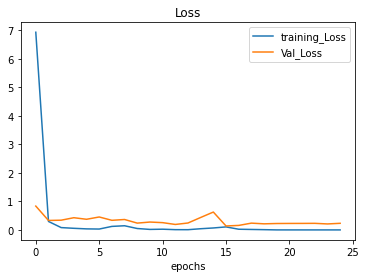

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training_Loss','Val_Loss'])
plt.title('Loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

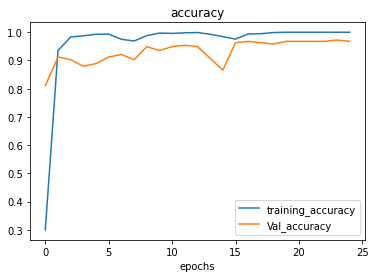

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training_accuracy','Val_accuracy'])
plt.title('accuracy')
plt.xlabel('epochs')

In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test, verbose=2)
print("test accurecy without augmentation")
print(test_acc)

8/8 - 2s - loss: 0.1171 - accuracy: 0.9717 - 2s/epoch - 232ms/step
test accurecy without augmentation
0.9716598987579346


#CNN Model 1 ( with **augmentation**)



In [ ]:
train_gen_augmanted = ImageDataGenerator(rotation_range=30,
                                         zoom_range=0.12,
                                         horizontal_flip=True)
trainGaug = train_gen_augmanted.flow(X_train,y_train,batch_size=32)


In [ ]:
history = model.fit_generator(trainGaug,
                                  steps_per_epoch=steps_train, 
                                  epochs=25,
                                  validation_data=validG,
                                  validation_steps=steps_validate,
                                  verbose=1,
                                  shuffle = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/25
62/62 [==============================] - 63s 1s/step - loss: 3.8500 - accuracy: 0.0376 - val_loss: 3.6066 - val_accuracy: 0.0509
Epoch 2/25
62/62 [==============================] - 63s 1s/step - loss: 3.5995 - accuracy: 0.0579 - val_loss: 3.5236 - val_accuracy: 0.0926
Epoch 3/25
62/62 [==============================] - 63s 1s/step - loss: 3.4977 - accuracy: 0.0920 - val_loss: 3.2918 - val_accuracy: 0.1343
Epoch 4/25
62/62 [==============================] - 64s 1s/step - loss: 3.3374 - accuracy: 0.1123 - val_loss: 2.9420 - val_accuracy: 0.2222
Epoch 5/25
62/62 [==============================] - 63s 1s/step - loss: 2.9822 - accuracy: 0.1794 - val_loss: 2.0501 - val_accuracy: 0.3843
Epoch 6/25
62/62 [==============================] - 63s 1s/step - loss: 2.3635 - accuracy: 0.3455 - val_loss: 1.1498 - val_accuracy: 0.6759
Epoch 7/25
62/62 [==============================] - 67s 1s/step - loss: 1.6030 - accuracy: 0.5295 - val_loss: 0.7124 - val_accuracy: 0.7917
Epoch 8/25
62/62 [==

#Best fit with **augmented** images

Text(0.5, 0, 'epochs')

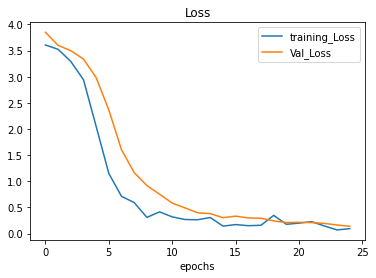

In [ ]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

plt.legend(['training_Loss','Val_Loss'])
plt.title('Loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

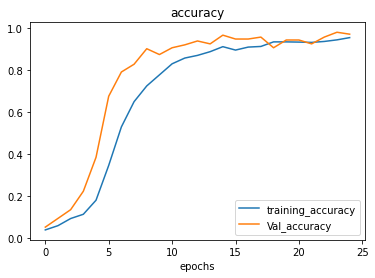

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training_accuracy','Val_accuracy'])
plt.title('accuracy')
plt.xlabel('epochs')

In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test, verbose=2)

8/8 - 2s - loss: 0.1348 - accuracy: 0.9757 - 2s/epoch - 309ms/step
